## IMDB Dataset
- A large dataset of moview review comments
- Reviews are flagged as positive or negative
- Contains 25,000 training data and 25,000 test data

In [1]:
from torchtext.legacy import data; # Field/Label
from torchtext.legacy import datasets; # IMDB

TEXT = data.Field(sequential=True, fix_length=256, batch_first=True, lower=True, tokenize=lambda s:s)
LABEL = data.LabelField(sequential=True)

train_all, test_all = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


100%|██████████| 84.1M/84.1M [00:03<00:00, 22.5MB/s]


In [2]:
print(len(train_all))
print(len(test_all))

25000
25000


In [3]:
print([t for t in train_all.text][0])
print([t for t in train_all.label][0])

i don't know whether to recommend this movie to the fans of " tetsuo " or not . why " tetsuo " ? because you can easily label some things about this movie as a very obvious " tetsuo " rip - off . the concept is similar , editing is equally frantic and fast - which is good because , aside from making the movie more dynamic , it obscures some flaws caused by low budget and other factors .<br /><br />there is lot more gore , less eroticism and , in the case of " meatball machine " , the transformation of human being into a creature that's partially a machine( sounds familiar ? ) called " necroborg " ( very original ) is caused by slimy little aliens .<br /><br />these slimy little scums from outer space actually use human beings as vessels for their gladiator games that they play with each other . they infest the body , somehow manage to put an insane amount of mechanical parts in it pulling them seemingly out of nowhere and turn it into a killing machine that targets other necroborgs . t

## Randomly Extract The Dataset

In [4]:
import random

In [78]:
train_size = 512
test_size = 64

In [79]:
pos_neg_dic = {
    'neg': 0,
    'pos': 1,
}

In [80]:
train = random.sample([(t, pos_neg_dic[l]) for (t, l) in zip(train_all.text, train_all.label)], train_size)

In [81]:
train[0]

('fabulous costumes by edith head who painted them on liz taylor at her finest!<br /><br />the sfx are very good for a movie of its age, and the stunt doubles actually looked like the actors, even down to body type, a rarity in movies of this vintage.<br /><br />a cozy movie, with splendid panoramas -- even when chopped down to pan and scan.',
 1)

In [82]:
test = random.sample([(t, pos_neg_dic[l]) for (t, l) in zip(test_all.text, test_all.label)], test_size)

In [83]:
test[0]

('**warning! slight plot spoilers ahead!**<br /><br />"the italian job" is not the best movie you\'ll see all year, or probably even this summer. but it is a worthwhile two hours because it colors within the lines, knowing its limits and not attempting to exceed them.<br /><br />what carries the movie is the work of the cast. in a movie about a crew of thieves, the individuals must have a good rapport with each other. without that cohesive feel, the audience doesn\'t believe in the characters collectively or individually, and the movie never has a chance. but from the first scenes, in which the men joke around and rag on each other while infiltrating a venetian palace, the proper chemistry is in place.<br /><br />the characters themselves aren\'t anything novel; they\'re your basic gang of criminals, containing about half a dozen players, each with a specific and defining skill. but each actor brings the proper goods to the table for his or her part. mark wahlberg\'s understated acting

In [84]:
import pandas as pd

train = pd.DataFrame(train, columns=['TEXT', 'LABEL'])
test = pd.DataFrame(test, columns=['TEXT', 'LABEL'])

In [85]:
train.head()

,TEXT,LABEL
0,fabulous costumes by edith head who painted th...,1
1,i'll admit to being biased when i reviewed thi...,1
2,the most moving and truly eye opening document...,1
3,north africa in the 1930's. to a small arab to...,1
4,this is the best film the derek couple has eve...,0


In [86]:
train['LABEL'].value_counts(normalize=True)

1    0.533203
0    0.466797
Name: LABEL, dtype: float64

In [87]:
!pip install transformers==3.1.0

In [88]:
from transformers import BertTokenizer

In [89]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [90]:
encoded = tokenizer('I like an apple')
encoded

{'input_ids': [101, 1045, 2066, 2019, 6207, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [91]:
tokenizer.decode(encoded['input_ids'])

'[CLS] i like an apple [SEP]'

In [92]:
encoded = tokenizer('I like an apple', 'I like an apple watch')
print(encoded)
print(tokenizer.decode(encoded['input_ids']))

{'input_ids': [101, 1045, 2066, 2019, 6207, 102, 1045, 2066, 2019, 6207, 3422, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
[CLS] i like an apple [SEP] i like an apple watch [SEP]


## Check Histogram of tokenized text for deciding maximum length for the input

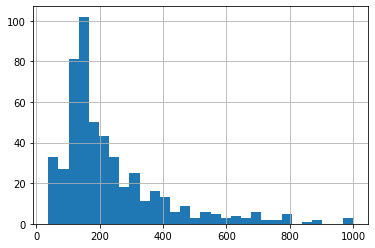

In [93]:
sequence_length = [len(w.split()) for w in train['TEXT']]
pd.Series(sequence_length).hist(bins=30)

In [94]:
max_sequence_length = 256

In [95]:
tokens_train = tokenizer.batch_encode_plus(
    train['TEXT'].tolist(),
    max_length = max_sequence_length,
    pad_to_max_length = True,
    truncation = True,
    return_token_type_ids = False
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [96]:
len([t for t in tokens_train['input_ids']])

512

In [97]:
tokens_test = tokenizer.batch_encode_plus(
    test['TEXT'].tolist(),
    max_length = max_sequence_length,
    pad_to_max_length = True,
    truncation = True,
    return_token_type_ids = False
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [98]:
import torch

In [99]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train['LABEL'], dtype=torch.long)

In [100]:
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test['LABEL'], dtype=torch.long)

In [101]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [102]:
batch_size = 16

In [103]:
train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [104]:
test_data = TensorDataset(test_seq, test_mask, test_y)
test_sampler = SequentialSampler(test_data)     # ここはランダムじゃない！
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [105]:
from transformers import AutoModel

In [106]:
bert = AutoModel.from_pretrained('bert-base-uncased')

In [107]:
for param in bert.parameters():
    param.requires_grad = False

## Model Definition

In [108]:
import torch.nn as nn

In [109]:
bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [110]:
class BERTBC(nn.Module):    # Bert Binary Classification
    def __init__(self, bert):
        super().__init__()
        self.bert = bert
        self.dropout = nn.Dropout(p=0.1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(768, 256)   # bert のモデル Embedding(30522, 768, padding_idx=0) から来ている
        self.fc2 = nn.Linear(256, 2)    # Binary Classification

    def forward(self, input_ids, attention_mask):
        _, cls = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = self.fc1(cls)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [111]:
net = BERTBC(bert)

In [112]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [113]:
device

device(type='cuda')

In [114]:
net = net.to(device)

In [115]:
input_ids, mask, labels = iter(train_dataloader).next()

In [116]:
input_ids[0]

tensor([  101,  9388,  4305, 24665,  3022,  1024,  2081,  1999,  2859,  2003,
         2019,  6581,  3185,  2008, 11230,  2129,  2048,  8578,  2031,  2172,
         1999,  2691,  2021,  1010,  2024,  2025,  2130,  5204,  1997,  1996,
         3747,  2169,  2554,  2038,  2006,  2028,  2178,  1012,  2585,  2417,
         8202,  2330,  2115,  2159,  1998,  4473,  2017,  2000,  2156,  2129,
         1996,  3667,  1999,  2859, 22027, 17530,  2008,  3465,  2210,  2000,
         2498,  1998,  2024,  2853,  1999,  2637,  2005,  2039,  2000,  2322,
         6363,  1012,  2043,  2417,  8202,  3980,  4841,  2055,  2073,  2122,
        17530,  2272,  2013,  2027,  2018,  2053,  9789,  1998,  2790, 12873,
         2631,  1012,  2043,  2002,  2409,  2068,  2008,  2027,  2024,  2081,
         1999,  2859,  2005,  2625,  2059,  2498,  2007,  9202,  3477,  1998,
        21873,  2551,  3785,  1010,  4841,  2790,  6517,  1010,  3480,  1010,
         1998,  1037,  2210, 23124,  3993,  2021,  2134,  1005, 

In [117]:
# tokenizer.decode?   # show help
tokenizer.decode(input_ids.numpy()[0])

"[CLS] mardi gras : made in china is an excellent movie that depicts how two cultures have much in common but, are not even aware of the influence each society has on one another. david redmon open your eyes and allows you to see how the workers in china manufactures beads that cost little to nothing and are sold in america for up to 20 dollars. when redmon questions americans about where these beads come from they had no clue and seemed dumb founded. when he told them that they are made in china for less then nothing with horrible pay and unacceptable working conditions, americans seemed sad, hurt, and a little remorseful but didn't really seem that they would stop purchasing the beads after finding out the truth. when redmon questioned the workers in china they did not know that americans were wearing them over their necks and paid so much for these beads. the workers laughed at what the purpose was behind beads and couldn't believe it. this movie is a great film that gives us someth

In [118]:
mask[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
labels[0]

tensor(1)

In [120]:
pos_neg_dic.items()

dict_items([('neg', 0), ('pos', 1)])

### Balance the class weight percentage

In [121]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_wts = compute_class_weight(
    class_weight = "balanced",
    classes = np.unique(train['LABEL']),
    y = train['LABEL']
)
# class_wts = dict(zip(np.unique(train['LABEL']), class_wts))

weights = torch.tensor(class_wts, dtype=torch.float)
# weights = torch.Tensor(class_wts)
weights = weights.to(device)


In [122]:
type(class_wts)

numpy.ndarray

### Define hyper parameters

In [123]:
criterion = nn.CrossEntropyLoss(weight=weights)

In [124]:
from transformers import AdamW

learning_rate = 1e-3
optimizer = AdamW(net.parameters(), lr=learning_rate)

## Training Model

In [125]:
import time

def fit():
    print('\nTraining...')
    net.train()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    t0 = time.time()
    elapsed = 0

    for step, batch in enumerate(train_dataloader):
        if step % 16 == 0 and not step == 0:
            elapsed = time.time() - t0
            print(f"Elapsed time:{elapsed:.3f}[sec.]")
            print('Batch {:>5} of {:>5}'.format(step, len(train_dataloader)))
        batch = [r.to(device) for r in batch]
        input_ids, mask, labels = batch

        net.zero_grad()
        preds = net(input_ids, mask)
        loss = criterion(preds, labels)
        total_loss += loss
        loss.backward()
        optimizer.step()

        torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
        preds = preds.detach().cpu().numpy()
        total_preds.append(preds)
    elapsed = time.time() - t0
    print(f"Elapsed time:{elapsed:.3f}[sec.]")
    avg_loss = total_loss / len(train_dataloader.dataset)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds

In [126]:
def evaluate():
    print('\nEvaluating...')
    net.eval()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    t0 = time.time()
    elapsed = 0

    for step, batch in enumerate(test_dataloader):
        if step % 16 == 0 and not step == 0:
            elapsed = time.time() - t0
            print(f"Elapsed time:{elapsed:.3f}[sec.]")
            print('Batch {:>5} of {:>5}'.format(step, len(test_dataloader)))
        batch = [r.to(device) for r in batch]
        input_ids, mask, labels = batch

        with torch.no_grad():
            preds = net(input_ids, mask)
            loss = criterion(preds, labels)
            total_loss += loss
            torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)
    elapsed = time.time() - t0
    print(f"Elapsed time:{elapsed:.3f}[sec.]")
    avg_loss = total_loss / len(train_dataloader.dataset)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds

In [128]:
epochs = 20

best_valid_loss = float('inf')

train_losses = []
val_losses = []

for epoch in range(epochs):
    print(f'\n Epoch:{epoch+1}/{epochs}')
    train_loss, _ = fit()
    valid_loss, _ = evaluate()

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(net.state_dict(), 'saved_weights.pt')
    train_losses.append(train_loss)
    val_losses.append(valid_loss)
    print(f'\n Traiing Loss:{train_loss:.3f}, Validation Loss:{valid_loss:.3f}')


 Epoch:1/20

Training...
Elapsed time:2.247[sec.]
Batch    16 of    32
Elapsed time:4.470[sec.]

Evaluating...
Elapsed time:0.533[sec.]

 Traiing Loss:0.040, Validation Loss:0.005

 Epoch:2/20

Training...
Elapsed time:2.224[sec.]
Batch    16 of    32
Elapsed time:4.448[sec.]

Evaluating...
Elapsed time:0.533[sec.]

 Traiing Loss:0.038, Validation Loss:0.005

 Epoch:3/20

Training...
Elapsed time:2.224[sec.]
Batch    16 of    32
Elapsed time:4.447[sec.]

Evaluating...
Elapsed time:0.534[sec.]

 Traiing Loss:0.039, Validation Loss:0.005

 Epoch:4/20

Training...
Elapsed time:2.223[sec.]
Batch    16 of    32
Elapsed time:4.445[sec.]

Evaluating...
Elapsed time:0.533[sec.]

 Traiing Loss:0.040, Validation Loss:0.005

 Epoch:5/20

Training...
Elapsed time:2.228[sec.]
Batch    16 of    32
Elapsed time:4.451[sec.]

Evaluating...
Elapsed time:0.533[sec.]

 Traiing Loss:0.037, Validation Loss:0.005

 Epoch:6/20

Training...
Elapsed time:2.224[sec.]
Batch    16 of    32
Elapsed time:4.448[sec.

## Evaluate the Model

In [129]:
path = 'saved_weights.pt'

In [130]:
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [131]:
with torch.no_grad():
    preds = net(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [132]:
preds = np.array([np.argmax(r) for r in preds])

In [133]:
from sklearn.metrics import classification_report
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        29
           1       0.80      0.69      0.74        35

    accuracy                           0.73        64
   macro avg       0.74      0.74      0.73        64
weighted avg       0.74      0.73      0.73        64



## Prediction

In [135]:
infer_text = ["I like Disney Movie."]
ids_mask = tokenizer.batch_encode_plus(infer_text, True, True, True, 256)

In [136]:
ids_mask

{'input_ids': [[101, 1045, 2066, 6373, 3185, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}

In [137]:
input_ids, attention_mask = ids_mask['input_ids'], ids_mask['attention_mask']

In [138]:
input_ids

[[101, 1045, 2066, 6373, 3185, 1012, 102]]

In [139]:
attention_mask

[[1, 1, 1, 1, 1, 1, 1]]

In [140]:
device

device(type='cuda')

In [141]:
prediction = net(torch.tensor(input_ids).to(device), torch.tensor(attention_mask, dtype=torch.long).to(device))

In [142]:
prediction

tensor([[-0.0166,  0.4855]], device='cuda:0', grad_fn=<AddmmBackward0>)